In [1]:
from timepix_geometry_correction.correct import TimepixGeometryCorrection
import os

from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

In [2]:
data = "data/siemens_star.tif"
assert os.path.exists(data)

In [3]:
o_corrector = TimepixGeometryCorrection(images_path=[data])
corrected = o_corrector.correct(display=False)


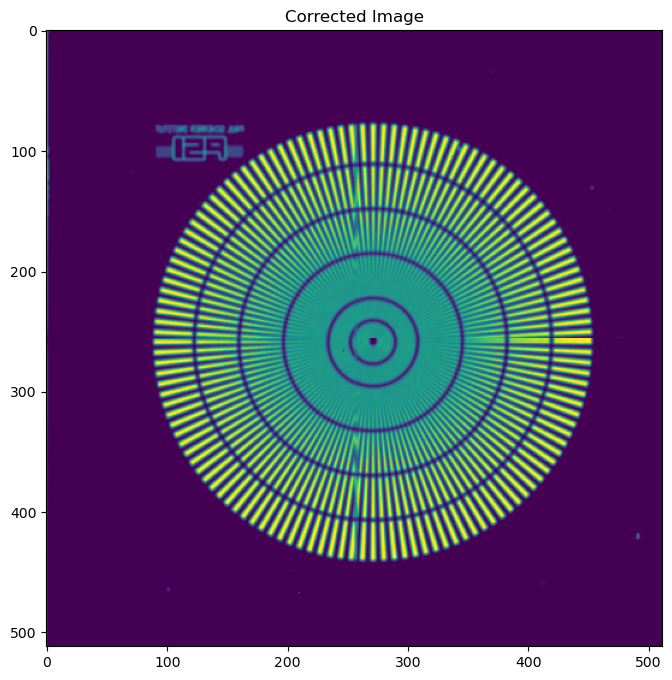

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(corrected[0], vmin=0.55, vmax=0.95, cmap='viridis')
ax.set_title("Corrected Image")
plt.show()

In [5]:
# output the corrected image for further analysis using pillow

corrected_image = corrected[0]
output_path = "data/corrected_siemens_star.tif"

Image.fromarray(corrected_image).save(output_path)
print(f"Corrected image saved to {output_path}")

Corrected image saved to data/corrected_siemens_star.tif


# testing list of images from list of path

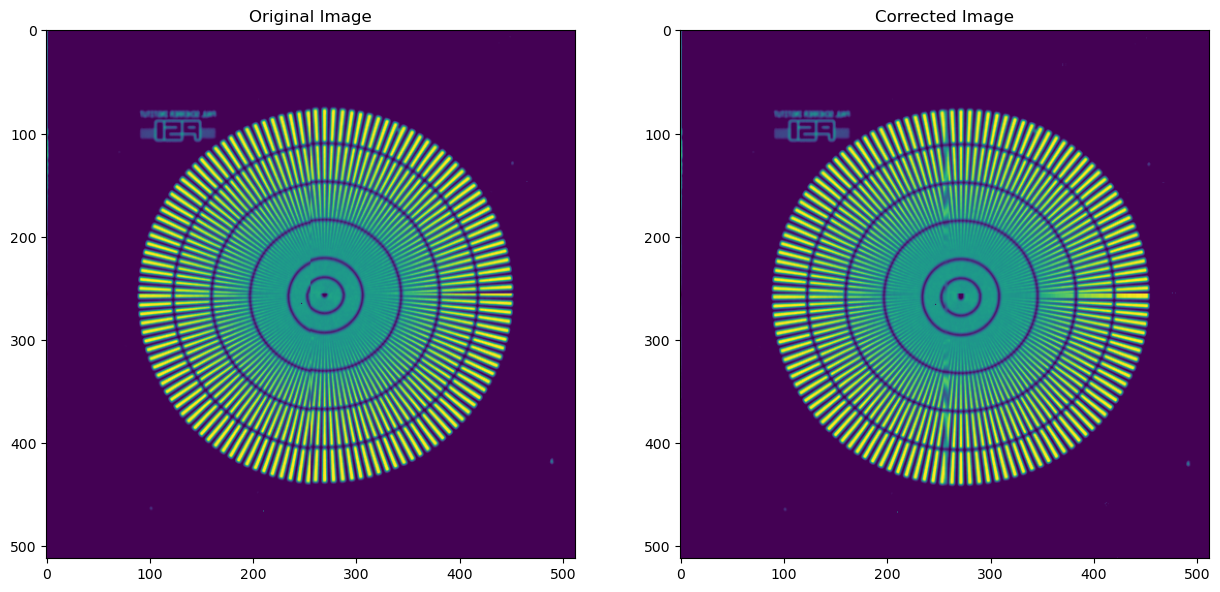

In [6]:
list_data_path = [data, data]

o_corrector = TimepixGeometryCorrection(images_path=list_data_path)
corrected = o_corrector.correct(display=True)

In [7]:
np.shape(corrected)

(2, 512, 512)

# testing list of images from list of data arrays

In [8]:
# load tiff images
list_data_arrays = []
for img_path in list_data_path:
    assert os.path.exists(img_path)
    img = Image.open(img_path)
    img_array = np.array(img)
    list_data_arrays.append(img_array)

In [9]:
np.shape(list_data_arrays)

(2, 512, 512)

In [10]:
o_corrector = TimepixGeometryCorrection(raw_images=list_data_arrays)
corrected = o_corrector.correct(display=True)

In [11]:
np.shape(corrected)

(2, 512, 512)